In [1]:
import pandas as pd
from hanspell import spell_checker

In [2]:
df = pd.read_csv('train.csv')

### **hanspell 적용**
##### label이 0인 것들만 뽑아서 맞춤법 교정 후 교정된 것만 선택

In [3]:
from hanspell import spell_checker
from tqdm import tqdm

df_0 = df[df['label'] == 0.0].copy()

def apply_hanspell(text):
    try:
        result = spell_checker.check(text)
        return result.as_dict()['checked']
    except:
        return text 

tqdm.pandas()
df_0 = df[df['label'] == 0.0]
df_0['sentence_1_spelled'] = df_0['sentence_1'].progress_apply(apply_hanspell)
df_0['sentence_2_spelled'] = df_0['sentence_2'].progress_apply(apply_hanspell)

100%|██████████| 2119/2119 [01:27<00:00, 24.31it/s]
/var/folders/q0/k3vp6h2n4v929r625p8dqcbr0000gn/T/ipykernel_26596/3863567303.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['sentence_1_spelled'] = df_0['sentence_1'].progress_apply(apply_hanspell)
100%|██████████| 2119/2119 [01:24<00:00, 24.94it/s]
/var/folders/q0/k3vp6h2n4v929r625p8dqcbr0000gn/T/ipykernel_26596/3863567303.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_0['sentence_2_spelled'] = df_0['sentence_2'].progress_apply(apply_ha

### label이 0인 것들만 뽑아서 맞춤법 교정 후 교정된 것만 선택

In [5]:
group_1 = df_0[df_0['sentence_1'] != df_0['sentence_1_spelled']]
group_2 = df_0[df_0['sentence_2'] != df_0['sentence_2_spelled']]

### sent1, sent2 둘다 바뀐 row의 인덱스만 추출

In [6]:
common_index = group_1.index.intersection(group_2.index)
group_common = df_0.loc[common_index].copy()

In [7]:
common_index

Index([   4,   14,   19,   38,   47,   55,   76,   79,   82,   91,
       ...
       9127, 9175, 9228, 9229, 9237, 9254, 9266, 9274, 9308, 9315],
      dtype='int64', length=776)


### |sent1 | spelled sent1|   
### |sent2 | spelled sent2|   


In [8]:
group_1_augmented = group_common.copy()
group_1_augmented['sentence_2'] = group_common['sentence_1_spelled']

In [9]:
group_2_augmented = group_common.copy()
group_2_augmented['sentence_1'] = group_common['sentence_2']
group_2_augmented['sentence_2'] = group_common['sentence_2_spelled']

In [10]:
group_1_augmented['id'] = 'aug1_' + group_1_augmented['id'].astype(str)
group_2_augmented['id'] = 'aug2_' + group_2_augmented['id'].astype(str)

In [11]:
group_1_augmented['index'] = group_1_augmented.index
group_2_augmented['index'] = group_2_augmented.index

In [12]:
group_augmented = pd.concat([group_1_augmented, group_2_augmented], ignore_index=True)
group_augmented = group_augmented.drop(['sentence_1_spelled', 'sentence_2_spelled'], axis=1)


In [ ]:
group_augmented.to_csv('v4_group_augmented.csv')

In [41]:
group_augmented

,id,source,sentence_1,sentence_2,label,binary-label,index
0,aug1_boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,뿌듯 뿌듯하네요!!,0.0,0.0,4
1,aug1_boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 게임 내에서 함께 팀을 맺고 캡처한 이미지입니다.,0.0,0.0,14
2,aug1_boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,내년 러시아 월드컵 자진 포기 청원 드립니다.,0.0,0.0,19
3,aug1_boostcamp-sts-v1-train-038,nsmc-sampled,아무리그래도 걸어간다는 설정은쫌-_-;,아무리 그래도 걸어간다는 설정은 좀-_-;,0.0,0.0,38
4,aug1_boostcamp-sts-v1-train-047,nsmc-sampled,동생이랑같이봤는데살인데 그닥무서워하지않고 잘본것같음....,동생이랑 같이 봤는데 살인데 그다지 무서워하지 않고 잘 본 것 같음....,0.0,0.0,47
...,...,...,...,...,...,...,...
1547,aug2_boostcamp-sts-v1-train-9254,petition-sampled,나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....,나라가 망해가고 있는 걸 젊은 24살 청년 또한 느끼고 있는 건.....,0.0,0.0,9254
1548,aug2_boostcamp-sts-v1-train-9266,petition-sampled,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만 원, 남은 건 집뿐인데 팔릴 수 있게 도와주세요",0.0,0.0,9266
1549,aug2_boostcamp-sts-v1-train-9274,nsmc-sampled,대만박스오피스 1위 대만 클라스 보소 -_-;;,대만 박스오피스 1위 대만 클래스 보소 -_-;;,0.0,0.0,9274
1550,aug2_boostcamp-sts-v1-train-9308,slack-sampled,넘넘 반가웠습니당.,넘넘 반가웠습니다.,0.0,0.0,9308


### 다운샘플링한 0.0 데이터들로 만든 새 데이터들의 label을 5.0, binary-label을 1.0으로 변경

In [44]:
hanspelled = group_augmented.copy()
hanspelled['label'] = 5.0
hanspelled['binary-label'] = 1.0

**s** : hanspell이 적용된 index가 담긴 세트

In [46]:
lst = hanspelled['index'].to_list()
s = set(lst)
len(s)

776

**filtered**: train 데이터셋에서 hanspelled에 있는 Index 제거하고 남은 데이터셋

In [50]:
train = pd.read_csv('train.csv')
filtered = train[~train.index.isin(s)]

### **hanspelled 파일에서 label 4.8에 500개, label 5.0에 1000개 정도 할당**

- hanspell이 적용되었는데 띄어쓰기만 고쳐진 데이터셋 중, 띄어쓰기가 얼마 추가되지 않은 데이터셋(적용 후 토큰 수-적용 전 토큰 수<3)을 가져와서 Bert-Token Insertion Augmentation 진행
- 증강된 데이터 중 불용어만 추가된 데이터셋 제외, 유사도 정렬해서 상위 493개 추출 후 label 4.8에 할당
- label 4.8에 할당되지 않고 남은 데이터셋은 전부 label 5.0에 할당


In [51]:
import re
import unicodedata

def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 한글, 영어, 공백을 제외한 모든 문자 제거
    text = re.sub(r'[^가-힣a-zA-Z\s]', '', text)
    # 공백 제거
    text = ''.join(text.split())

    return text

def compare_sentences(sentence1, sentence2):
    preprocessed_sentence1 = preprocess_text(sentence1)
    preprocessed_sentence2 = preprocess_text(sentence2)
    
    return preprocessed_sentence1 == preprocessed_sentence2

# 예시
sentence1 = "잔잔한 감동으로 다가온 영화,"
sentence2 = "잔잔한 감동으로 다가온영화"

result = compare_sentences(sentence1, sentence2)
print(result)  # True 또는 False

True


In [52]:
hanspelled['are_equal'] = hanspelled.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_2']), axis=1)
equal = hanspelled[hanspelled['are_equal']]
equal = equal.drop(columns='are_equal')
equal

,id,source,sentence_1,sentence_2,label,binary-label,index
0,aug1_boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,뿌듯 뿌듯하네요!!,5.0,1.0,4
2,aug1_boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,내년 러시아 월드컵 자진 포기 청원 드립니다.,5.0,1.0,19
5,aug1_boostcamp-sts-v1-train-055,nsmc-sampled,근데 멜로연기는 영 ㅋㅋㅋ,근데 멜로 연기는 영 ㅋㅋㅋ,5.0,1.0,55
6,aug1_boostcamp-sts-v1-train-076,nsmc-sampled,후반들어 법적공방과 반전은 이영화의 묘미.,후반 들어 법적 공방과 반전은 이 영화의 묘미.,5.0,1.0,76
7,aug1_boostcamp-sts-v1-train-079,petition-sampled,조두순 형량증가를 청원합니다,조두순 형량 증가를 청원합니다,5.0,1.0,79
...,...,...,...,...,...,...,...
1545,aug2_boostcamp-sts-v1-train-9229,nsmc-sampled,과연 귀신영화는 미국인한테 어울릴까요?,과연 귀신 영화는 미국인한테 어울릴까요?,5.0,1.0,9229
1546,aug2_boostcamp-sts-v1-train-9237,slack-sampled,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 멀리 나온 걸로!,5.0,1.0,9237
1547,aug2_boostcamp-sts-v1-train-9254,petition-sampled,나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....,나라가 망해가고 있는 걸 젊은 24살 청년 또한 느끼고 있는 건.....,5.0,1.0,9254
1548,aug2_boostcamp-sts-v1-train-9266,petition-sampled,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만 원, 남은 건 집뿐인데 팔릴 수 있게 도와주세요",5.0,1.0,9266


In [53]:
equal_filtered = equal[
    (equal['sentence_2'].apply(lambda x: len(x.split())) - equal['sentence_1'].apply(lambda x: len(x.split()))).abs() < 3
]
equal_filtered

,id,source,sentence_1,sentence_2,label,binary-label,index
0,aug1_boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,뿌듯 뿌듯하네요!!,5.0,1.0,4
5,aug1_boostcamp-sts-v1-train-055,nsmc-sampled,근데 멜로연기는 영 ㅋㅋㅋ,근데 멜로 연기는 영 ㅋㅋㅋ,5.0,1.0,55
7,aug1_boostcamp-sts-v1-train-079,petition-sampled,조두순 형량증가를 청원합니다,조두순 형량 증가를 청원합니다,5.0,1.0,79
8,aug1_boostcamp-sts-v1-train-082,petition-sampled,대동강 맥주 수입바랍니다!!!,대동강 맥주 수입 바랍니다!!!,5.0,1.0,82
9,aug1_boostcamp-sts-v1-train-091,petition-sampled,이민을 허용해주세요,이민을 허용해 주세요,5.0,1.0,91
...,...,...,...,...,...,...,...
1544,aug2_boostcamp-sts-v1-train-9228,nsmc-sampled,세이상 답게 유치짱ㅋ,세 이상답게 유치짱ㅋ,5.0,1.0,9228
1545,aug2_boostcamp-sts-v1-train-9229,nsmc-sampled,과연 귀신영화는 미국인한테 어울릴까요?,과연 귀신 영화는 미국인한테 어울릴까요?,5.0,1.0,9229
1546,aug2_boostcamp-sts-v1-train-9237,slack-sampled,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 멀리 나온 걸로!,5.0,1.0,9237
1548,aug2_boostcamp-sts-v1-train-9266,petition-sampled,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만 원, 남은 건 집뿐인데 팔릴 수 있게 도와주세요",5.0,1.0,9266


In [54]:
from BERT_augmentation import BERT_Augmentation

BERT_aug = BERT_Augmentation()
random_masking_insertion = BERT_aug.random_masking_insertion

/Users/suakim/.pyenv/versions/3.11.0/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/suakim/.pyenv/versions/3.11.0/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [55]:
equal_filtered['sentence_bert'] = equal_filtered['sentence_2'].apply(lambda x: random_masking_insertion(x))
equal_filtered

/var/folders/q0/k3vp6h2n4v929r625p8dqcbr0000gn/T/ipykernel_26596/911743895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equal_filtered['sentence_bert'] = equal_filtered['sentence_2'].apply(lambda x: random_masking_insertion(x))


,id,source,sentence_1,sentence_2,label,binary-label,index,sentence_bert
0,aug1_boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,뿌듯 뿌듯하네요!!,5.0,1.0,4,뿌듯 뿌듯하네요!!
5,aug1_boostcamp-sts-v1-train-055,nsmc-sampled,근데 멜로연기는 영 ㅋㅋㅋ,근데 멜로 연기는 영 ㅋㅋㅋ,5.0,1.0,55,ㅋㅋㅋ 근데 멜로 연기는 영 ㅋㅋㅋ
7,aug1_boostcamp-sts-v1-train-079,petition-sampled,조두순 형량증가를 청원합니다,조두순 형량 증가를 청원합니다,5.0,1.0,79,또한 조두순 형량 증가를 청원합니다
8,aug1_boostcamp-sts-v1-train-082,petition-sampled,대동강 맥주 수입바랍니다!!!,대동강 맥주 수입 바랍니다!!!,5.0,1.0,82,대동강 맥주 정식 수입 바랍니다!!!
9,aug1_boostcamp-sts-v1-train-091,petition-sampled,이민을 허용해주세요,이민을 허용해 주세요,5.0,1.0,91,이민을 허용해 주세요
...,...,...,...,...,...,...,...,...
1544,aug2_boostcamp-sts-v1-train-9228,nsmc-sampled,세이상 답게 유치짱ㅋ,세 이상답게 유치짱ㅋ,5.0,1.0,9228,세 이상답게 유치짱ㅋ
1545,aug2_boostcamp-sts-v1-train-9229,nsmc-sampled,과연 귀신영화는 미국인한테 어울릴까요?,과연 귀신 영화는 미국인한테 어울릴까요?,5.0,1.0,9229,그런데 과연 귀신 영화는 미국인한테 어울릴까요?
1546,aug2_boostcamp-sts-v1-train-9237,slack-sampled,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 멀리 나온 걸로!,5.0,1.0,9237,ㅋㅋ ㅋㅋ 제가 멀리 나온 걸로!
1548,aug2_boostcamp-sts-v1-train-9266,petition-sampled,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만 원, 남은 건 집뿐인데 팔릴 수 있게 도와주세요",5.0,1.0,9266,"병원비 이천만 원, 지금 남은 건 집뿐인데 팔릴 수 있게끔 도와주세요"


In [57]:
equal_filtered['are_equal'] = equal_filtered.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_bert']), axis=1)
equal = equal_filtered[equal_filtered['are_equal']]
equal

/var/folders/q0/k3vp6h2n4v929r625p8dqcbr0000gn/T/ipykernel_26596/1183070036.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  equal_filtered['are_equal'] = equal_filtered.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_bert']), axis=1)


,id,source,sentence_1,sentence_2,label,binary-label,index,sentence_bert,are_equal
0,aug1_boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,뿌듯 뿌듯하네요!!,5.0,1.0,4,뿌듯 뿌듯하네요!!,True
5,aug1_boostcamp-sts-v1-train-055,nsmc-sampled,근데 멜로연기는 영 ㅋㅋㅋ,근데 멜로 연기는 영 ㅋㅋㅋ,5.0,1.0,55,ㅋㅋㅋ 근데 멜로 연기는 영 ㅋㅋㅋ,True
9,aug1_boostcamp-sts-v1-train-091,petition-sampled,이민을 허용해주세요,이민을 허용해 주세요,5.0,1.0,91,이민을 허용해 주세요,True
15,aug1_boostcamp-sts-v1-train-138,nsmc-sampled,기대보단 기대보단...우연의 과도함,기대보단 기대보단... 우연의 과도함,5.0,1.0,138,기대보단. 기대보단... 우연의 과도함,True
42,aug1_boostcamp-sts-v1-train-460,petition-sampled,번역청을 설립해주십시오,번역청을 설립해 주십시오,5.0,1.0,460,번역청을 설립해 주십시오,True
...,...,...,...,...,...,...,...,...,...
1523,aug2_boostcamp-sts-v1-train-8911,nsmc-sampled,말이 안나오지....,말이 안 나오지....,5.0,1.0,8911,말이 안 나오지....,True
1525,aug2_boostcamp-sts-v1-train-8938,petition-sampled,허경영을 다음대통령으로!!!!!!!!!!!!!!!!!!!!,허경영을 다음 대통령으로!!!!!!!!!!!!!!!!!!!!,5.0,1.0,8938,허경영을 다음 대통령으로!!!!!!!!!!!!!!!!!!!!,True
1542,aug2_boostcamp-sts-v1-train-9127,slack-sampled,제가 강퇴처리를.....,제가 강퇴 처리를.....,5.0,1.0,9127,제가 강퇴 처리를.....,True
1544,aug2_boostcamp-sts-v1-train-9228,nsmc-sampled,세이상 답게 유치짱ㅋ,세 이상답게 유치짱ㅋ,5.0,1.0,9228,세 이상답게 유치짱ㅋ,True


In [58]:
not_equal = equal_filtered[~equal_filtered['are_equal']]
not_equal

,id,source,sentence_1,sentence_2,label,binary-label,index,sentence_bert,are_equal
7,aug1_boostcamp-sts-v1-train-079,petition-sampled,조두순 형량증가를 청원합니다,조두순 형량 증가를 청원합니다,5.0,1.0,79,또한 조두순 형량 증가를 청원합니다,False
8,aug1_boostcamp-sts-v1-train-082,petition-sampled,대동강 맥주 수입바랍니다!!!,대동강 맥주 수입 바랍니다!!!,5.0,1.0,82,대동강 맥주 정식 수입 바랍니다!!!,False
13,aug1_boostcamp-sts-v1-train-128,nsmc-sampled,남주 음식 흡입장면은 혐오감으로 편집바람.,남주 음식 흡입 장면은 혐오감으로 편집 바람.,5.0,1.0,128,남주의 음식 흡입 장면은 혐오감으로 편집 바람.,False
14,aug1_boostcamp-sts-v1-train-129,petition-sampled,이동식과속단속카메라 대신 과속단속cctv를 설치해 주세요.,이동식 과속단속카메라 대신 과속단속 cctv를 설치해 주세요.,5.0,1.0,129,이동식으로 과속단속카메라 대신 과속단속 cctv를 설치해 주세요.,False
16,aug1_boostcamp-sts-v1-train-184,nsmc-sampled,물론 아이들 동화같은건 아니고요.,물론 아이들 동화 같은 건 아니고요.,5.0,1.0,184,물론 아이들 동화 같은 건 물론 아니고요.,False
...,...,...,...,...,...,...,...,...,...
1541,aug2_boostcamp-sts-v1-train-9126,nsmc-sampled,화려한 명품과 경쾌한 음악 뿐이었던 것 같다.,화려한 명품과 경쾌한 음악뿐이었던 것 같다.,5.0,1.0,9126,화려한 명품과 경쾌한 클래식 음악뿐이었던 것 같다.,False
1543,aug2_boostcamp-sts-v1-train-9175,nsmc-sampled,김조광수의 뚝심도 높이 사지만....영화도 잘 만든 듯....,김조광수의 뚝심도 높이 사지만.... 영화도 잘 만든 듯....,5.0,1.0,9175,김조광수의 뚝심도 높이 사지만.... 영화도 잘 만든 일인 듯....,False
1545,aug2_boostcamp-sts-v1-train-9229,nsmc-sampled,과연 귀신영화는 미국인한테 어울릴까요?,과연 귀신 영화는 미국인한테 어울릴까요?,5.0,1.0,9229,그런데 과연 귀신 영화는 미국인한테 어울릴까요?,False
1548,aug2_boostcamp-sts-v1-train-9266,petition-sampled,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만 원, 남은 건 집뿐인데 팔릴 수 있게 도와주세요",5.0,1.0,9266,"병원비 이천만 원, 지금 남은 건 집뿐인데 팔릴 수 있게끔 도와주세요",False


In [59]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("jhgan/ko-sbert-nli")
model = AutoModel.from_pretrained("jhgan/ko-sbert-nli")

/Users/suakim/.pyenv/versions/3.11.0/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [60]:
import torch

def get_emb(sentences):
#Mean Pooling - Take attention mask into account for correct averaging
  def mean_pooling(model_output, attention_mask):
      token_embeddings = model_output[0] #First element of model_output contains all token embeddings
      input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
      return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

  # Load model from HuggingFace Hub
  tokenizer = AutoTokenizer.from_pretrained('jhgan/ko-sbert-nli')
  model = AutoModel.from_pretrained('jhgan/ko-sbert-nli')

  sen1 = []
  sen2 = []
  # Tokenize sentences
  for sentence in sentences:
    encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling. In this case, mean pooling.
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    sen1.append(sentence_embeddings[0])
    sen2.append(sentence_embeddings[1])
  return sen1, sen2

In [61]:
def cos_sim(sen1, sen2):
  ans = []
  for a, b in zip(sen1, sen2):
    ans.append((torch.dot(a, b) / (torch.norm(a)*torch.norm(b))).item())
  return ans

In [62]:
sentences = list(zip(not_equal['sentence_1'], not_equal['sentence_bert']))
sen1, sen2 = get_emb(sentences)
not_equal['cos_sim'] = cos_sim(sen1, sen2)
not_equal = not_equal.sort_values(by='cos_sim', ascending=False)
not_equal

/Users/suakim/.pyenv/versions/3.11.0/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/var/folders/q0/k3vp6h2n4v929r625p8dqcbr0000gn/T/ipykernel_26596/1176908600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  not_equal['cos_sim'] = cos_sim(sen1, sen2)


,id,source,sentence_1,sentence_2,label,binary-label,index,sentence_bert,are_equal,cos_sim
116,aug1_boostcamp-sts-v1-train-1406,slack-sampled,밖에 보이는 것은… 한..한강 다리에요?! 와우!,밖에 보이는 것은… 한.. 한강 다리에요?! 와우!,5.0,1.0,1406,밖에서 보이는 것은 … 한.. 한강 다리에요?! 와우!,False,0.997844
420,aug1_boostcamp-sts-v1-train-5067,petition-sampled,집안 핵(방사능)문제도 관심 좀 가져주십시오.,집안 핵(방사능) 문제도 관심 좀 가져주십시오.,5.0,1.0,5067,집안 핵 ( 방사능 ) 문제도 좀 관심 좀 가져주십시오.,False,0.996962
979,aug2_boostcamp-sts-v1-train-2448,petition-sampled,제발 좀 공교육의 질과 위상을 향상 시켜 주세요!!!!!!!!!!!!!!!!!!,제발 좀 공교육의 질과 위상을 향상시켜 주세요!!!!!!!!!!!!!!!!!!,5.0,1.0,2448,제발 좀 공교육의 질적 질과 위상을 향상시켜 주세요!!!!!!!!!!!!!!!!!!,False,0.996700
1462,aug2_boostcamp-sts-v1-train-8153,slack-sampled,DisplayLink 라는 기술을 이용하면 여러 외장 모니터를 사용할 수 있습니다.,DisplayLink라는 기술을 이용하면 여러 외장 모니터를 사용할 수 있습니다.,5.0,1.0,8153,DisplayLink라는 기술을 이용하면 여러 외장 모니터를 사용할 할 수 있습니다.,False,0.996360
137,aug1_boostcamp-sts-v1-train-1692,slack-sampled,저만 술에 취한 줄 알았는데...나만 아니었군요.,저만 술에 취한 줄 알았는데... 나만 아니었군요.,5.0,1.0,1692,저만 술에 취한 건 줄 알았는데... 나만 아니었군요.,False,0.996255
...,...,...,...,...,...,...,...,...,...,...
499,aug1_boostcamp-sts-v1-train-5949,nsmc-sampled,그리고 이영화 이미 풀렸음..,그리고 이 영화 이미 풀렸음..,5.0,1.0,5949,그리고 이 두 영화 이미 풀렸음..,False,0.677719
894,aug2_boostcamp-sts-v1-train-1452,nsmc-sampled,이건진짜 레알영화다...,이건 진짜 레알 영화다...,5.0,1.0,1452,이건 진짜 레알 쓰레기 영화다...,False,0.657166
29,aug1_boostcamp-sts-v1-train-267,slack-sampled,# 한번만 눌러주시면 됩니다!!,# 한 번만 눌러주시면 됩니다!!,5.0,1.0,267,# 한 번만 눌러주시면 안 됩니다!!,False,0.653415
1338,aug2_boostcamp-sts-v1-train-6799,petition-sampled,범죄처벌 제대로 해주십시오,범죄 처벌 제대로 해주십시오,5.0,1.0,6799,범죄 처벌 제대로 안 해주십시오,False,0.624512


In [63]:
label_48 = not_equal.iloc[:493]
label_48 = label_48.drop(columns='sentence_2')
label_48 = label_48.rename(columns={'sentence_bert': 'sentence_2'})
label_48['label'] = 4.8
label_48['binary-label'] = 1.0
label_48

,id,source,sentence_1,label,binary-label,index,sentence_2,are_equal,cos_sim
116,aug1_boostcamp-sts-v1-train-1406,slack-sampled,밖에 보이는 것은… 한..한강 다리에요?! 와우!,4.8,1.0,1406,밖에서 보이는 것은 … 한.. 한강 다리에요?! 와우!,False,0.997844
420,aug1_boostcamp-sts-v1-train-5067,petition-sampled,집안 핵(방사능)문제도 관심 좀 가져주십시오.,4.8,1.0,5067,집안 핵 ( 방사능 ) 문제도 좀 관심 좀 가져주십시오.,False,0.996962
979,aug2_boostcamp-sts-v1-train-2448,petition-sampled,제발 좀 공교육의 질과 위상을 향상 시켜 주세요!!!!!!!!!!!!!!!!!!,4.8,1.0,2448,제발 좀 공교육의 질적 질과 위상을 향상시켜 주세요!!!!!!!!!!!!!!!!!!,False,0.996700
1462,aug2_boostcamp-sts-v1-train-8153,slack-sampled,DisplayLink 라는 기술을 이용하면 여러 외장 모니터를 사용할 수 있습니다.,4.8,1.0,8153,DisplayLink라는 기술을 이용하면 여러 외장 모니터를 사용할 할 수 있습니다.,False,0.996360
137,aug1_boostcamp-sts-v1-train-1692,slack-sampled,저만 술에 취한 줄 알았는데...나만 아니었군요.,4.8,1.0,1692,저만 술에 취한 건 줄 알았는데... 나만 아니었군요.,False,0.996255
...,...,...,...,...,...,...,...,...,...
716,aug1_boostcamp-sts-v1-train-8489,nsmc-sampled,크레이지 뷰티풀 영화를 보는내내 제목선정을 너무 잘했네 라는 생각이 든다. 크레이지...,4.8,1.0,8489,크레이지 뷰티풀 영화를 보는 내내 제목의 선정을 너무 잘했네라는 생각이 절로 든다....,False,0.956372
1047,aug2_boostcamp-sts-v1-train-3230,slack-sampled,떡 돌린일은 정말 잘한 일인듯 합니다.,4.8,1.0,3230,떡 돌린 일은 정말 잘한 할 일인 듯합니다.,False,0.956311
836,aug2_boostcamp-sts-v1-train-715,nsmc-sampled,일본영화 질이 놓다.,4.8,1.0,715,요즘 일본 영화 질이 놓다.,False,0.956196
579,aug1_boostcamp-sts-v1-train-7046,nsmc-sampled,패션왕코리아가 매번 시즌을 이어갔으면 좋겠습니다 굿,4.8,1.0,7046,역시 패션왕 코리아가 매번 시즌을 이어갔으면 좋겠습니다 굿,False,0.955970


In [64]:
label_5 = hanspelled.loc[~hanspelled.index.isin(label_48.index)]
label_5

,id,source,sentence_1,sentence_2,label,binary-label,index,are_equal
0,aug1_boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,뿌듯 뿌듯하네요!!,5.0,1.0,4,True
1,aug1_boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 게임 내에서 함께 팀을 맺고 캡처한 이미지입니다.,5.0,1.0,14,False
2,aug1_boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,내년 러시아 월드컵 자진 포기 청원 드립니다.,5.0,1.0,19,True
3,aug1_boostcamp-sts-v1-train-038,nsmc-sampled,아무리그래도 걸어간다는 설정은쫌-_-;,아무리 그래도 걸어간다는 설정은 좀-_-;,5.0,1.0,38,False
4,aug1_boostcamp-sts-v1-train-047,nsmc-sampled,동생이랑같이봤는데살인데 그닥무서워하지않고 잘본것같음....,동생이랑 같이 봤는데 살인데 그다지 무서워하지 않고 잘 본 것 같음....,5.0,1.0,47,False
...,...,...,...,...,...,...,...,...
1544,aug2_boostcamp-sts-v1-train-9228,nsmc-sampled,세이상 답게 유치짱ㅋ,세 이상답게 유치짱ㅋ,5.0,1.0,9228,True
1546,aug2_boostcamp-sts-v1-train-9237,slack-sampled,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 멀리 나온 걸로!,5.0,1.0,9237,True
1547,aug2_boostcamp-sts-v1-train-9254,petition-sampled,나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....,나라가 망해가고 있는 걸 젊은 24살 청년 또한 느끼고 있는 건.....,5.0,1.0,9254,True
1549,aug2_boostcamp-sts-v1-train-9274,nsmc-sampled,대만박스오피스 1위 대만 클라스 보소 -_-;;,대만 박스오피스 1위 대만 클래스 보소 -_-;;,5.0,1.0,9274,False


In [65]:
auged = pd.concat([label_5, label_48])
auged = auged.drop(columns=['are_equal', 'cos_sim'])
auged

,id,source,sentence_1,sentence_2,label,binary-label,index
0,aug1_boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,뿌듯 뿌듯하네요!!,5.0,1.0,4
1,aug1_boostcamp-sts-v1-train-014,slack-sampled,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 게임 내에서 함께 팀을 맺고 캡처한 이미지입니다.,5.0,1.0,14
2,aug1_boostcamp-sts-v1-train-019,petition-sampled,내년 러시아월드컵 자진포기 청원드립니다.,내년 러시아 월드컵 자진 포기 청원 드립니다.,5.0,1.0,19
3,aug1_boostcamp-sts-v1-train-038,nsmc-sampled,아무리그래도 걸어간다는 설정은쫌-_-;,아무리 그래도 걸어간다는 설정은 좀-_-;,5.0,1.0,38
4,aug1_boostcamp-sts-v1-train-047,nsmc-sampled,동생이랑같이봤는데살인데 그닥무서워하지않고 잘본것같음....,동생이랑 같이 봤는데 살인데 그다지 무서워하지 않고 잘 본 것 같음....,5.0,1.0,47
...,...,...,...,...,...,...,...
716,aug1_boostcamp-sts-v1-train-8489,nsmc-sampled,크레이지 뷰티풀 영화를 보는내내 제목선정을 너무 잘했네 라는 생각이 든다. 크레이지...,크레이지 뷰티풀 영화를 보는 내내 제목의 선정을 너무 잘했네라는 생각이 절로 든다....,4.8,1.0,8489
1047,aug2_boostcamp-sts-v1-train-3230,slack-sampled,떡 돌린일은 정말 잘한 일인듯 합니다.,떡 돌린 일은 정말 잘한 할 일인 듯합니다.,4.8,1.0,3230
836,aug2_boostcamp-sts-v1-train-715,nsmc-sampled,일본영화 질이 놓다.,요즘 일본 영화 질이 놓다.,4.8,1.0,715
579,aug1_boostcamp-sts-v1-train-7046,nsmc-sampled,패션왕코리아가 매번 시즌을 이어갔으면 좋겠습니다 굿,역시 패션왕 코리아가 매번 시즌을 이어갔으면 좋겠습니다 굿,4.8,1.0,7046


### **(0.0, 4.4] swapping**

In [66]:
filtered_df = train[((train['label'] > 0.0) & (train['label'] <= 4.4))]
filtered_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [67]:
filtered_df = filtered_df.rename(columns={
    'sentence_1': 'temp_sentence',
    'sentence_2': 'sentence_1'
})
filtered_df = filtered_df.rename(columns={
    'temp_sentence': 'sentence_2'
})

filtered_df

,id,source,sentence_2,sentence_1,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


In [68]:
augandswap = pd.concat([filtered_df, auged])
augandswap

,id,source,sentence_2,sentence_1,label,binary-label,index
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0,NaN
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0,NaN
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0,NaN
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0,NaN
5,boostcamp-sts-v1-train-005,nsmc-rtt,오마이가뜨지져스크롸이스트휏,오 마이 갓 지저스 스크론 이스트 팬,2.6,1.0,NaN
...,...,...,...,...,...,...,...
716,aug1_boostcamp-sts-v1-train-8489,nsmc-sampled,크레이지 뷰티풀 영화를 보는 내내 제목의 선정을 너무 잘했네라는 생각이 절로 든다....,크레이지 뷰티풀 영화를 보는내내 제목선정을 너무 잘했네 라는 생각이 든다. 크레이지...,4.8,1.0,8489.0
1047,aug2_boostcamp-sts-v1-train-3230,slack-sampled,떡 돌린 일은 정말 잘한 할 일인 듯합니다.,떡 돌린일은 정말 잘한 일인듯 합니다.,4.8,1.0,3230.0
836,aug2_boostcamp-sts-v1-train-715,nsmc-sampled,요즘 일본 영화 질이 놓다.,일본영화 질이 놓다.,4.8,1.0,715.0
579,aug1_boostcamp-sts-v1-train-7046,nsmc-sampled,역시 패션왕 코리아가 매번 시즌을 이어갔으면 좋겠습니다 굿,패션왕코리아가 매번 시즌을 이어갔으면 좋겠습니다 굿,4.8,1.0,7046.0


In [69]:
augandswap.to_csv('augandswap.csv')

### **4.5, 4.6 augmentation**

In [71]:
top_1000_1 = pd.read_csv('./top_1000_1.csv')

In [72]:
common_index = filtered.index.intersection(top_1000_1.index)
common_1 = top_1000_1.loc[common_index]

In [74]:
common_1['are_equal'] = common_1.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_2']), axis=1)
not_equal_1 = common_1[~common_1['are_equal']]
not_equal_1

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
3,1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761,False
8,5109,그 와중에 눈감으신 순간을 캡쳐해버렸네요…,그 와중에서 눈감으신 순간을 캡쳐해버렸네요 …,0.998501,False
10,7830,ㅋㅋ 사다리타기로 한분만 제외당할수 있으십니다..!!,ㅋㅋ 사다리타기로 한분만 제외당할수가 있으십니다..!!,0.998336,False
12,3255,골프장이 체육시설의 설치이용에 관한 법률 제21조를 준수하게 해주세요,골프장이 체육시설의 설치이용에 관한 법률 제21조를 준수하게끔 해주세요,0.998194,False
15,8661,"주택가 도로에 일부러 소리내는 오토바이, 챠량 단속좀 합시다.","주택가 도로에 일부러 소리내는 오토바이, 챠량 단속좀 좀 합시다.",0.998167,False
...,...,...,...,...,...
995,212,시대를 타지 않는 명작...셰익스피어 원작 그자체,시대를 타지 않는 한 명작... 셰익스피어 원작 그자체,0.960833,False
996,1517,공유가 필요하신 페이지 링크 공유주실 수 있을까요?,공유가 필요하신 페이지 링크 공유주실 알 수 있을까요?,0.960741,False
997,7036,진짜 빨리 써주셨네요 ㅎㅎ,진짜 너무 빨리 써주셨네요 ㅎㅎ,0.960638,False
998,2825,이정도면 잘 만들어진 속편,이정도면 잘 만들어진다 속편,0.960484,False


In [75]:
top_1000_2 = pd.read_csv('top_1000_2.csv')

In [76]:
top_1000_2['are_equal'] = top_1000_2.apply(lambda row: compare_sentences(row['sentence_1'], row['sentence_2']), axis=1)
not_equal_2 = top_1000_2[~top_1000_2['are_equal']]
not_equal_2

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
0,4899,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,1.000000,False
2,2947,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,0.999481,False
5,3123,페북보다보니 인공지능 관련 특허관련 자료가 있어서 가져왔습니다.,페북보다보니 인공지능 관련 특허관련한 자료가 있어서 가져왔습니다.,0.999017,False
9,199,제1차~2차연평해전 및 천안함사태에 구체적인피해보상과 재발방지에 관하여 문재인대통령...,제1차 ~ 2차연평해전 및 천안함사태에 대한 구체적인피해보상과 재발방지에 관하여 문...,0.998812,False
13,7422,저도 1년 정도 여러가지 시도들을 해 봤어요..,저도 1년 정도 여러가지 시도들을 해 해 봤어요..,0.998589,False
...,...,...,...,...,...
962,7767,이렇게 또 우리 회사 웨이 교육받고 갑니다...,이렇게 또 다시 우리 회사 웨이 교육받고 갑니다...,0.912923,False
963,2782,지방직 공무원도 육아기단축근무 허용해주세요~!!!!!!!!,모든 지방직 공무원도 육아기단축근무 허용해주세요 ~!!!!!!!!,0.912012,False
964,1933,그럼 전 놋북 덮고 뛰러 갑니다,그럼 전에 놋북 덮고 뛰러 갑니다,0.911901,False
965,9053,오랫만에 즐겨보게 된 드라마,오랫만에 즐겨보게 된 SBS 드라마,0.911351,False


In [77]:
common_index = not_equal_1.index.intersection(not_equal_2.index)
group_1_common = not_equal_1.loc[common_index]
group_2_common = not_equal_2.loc[common_index]

In [78]:
group_1_common = group_1_common.iloc[:250]
group_1_common

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
18,7813,다음번에는 롤도 같이 하기로 약속하며 짧았지만 즐거운 이야기 시간이였습니다!,다음번에는 롤도 같이 하기로 약속하며 짧았지만 즐거운 이야기의 시간이였습니다!,0.998148,False
22,8465,국가토지 임대후 그 토지를 전대하여 이득을 취하는자 엄벌,국가토지 임대후 그 토지를 전대하여 그 이득을 취하는자 엄벌,0.998039,False
26,4270,여수화양농공단지 공기오염 해결과 학교석면제거작업의 철저화 촉구,여수화양농공단지 공기오염 해결과 학교석면제거작업의 철저화를 촉구,0.997891,False
31,2845,오스틴파워가 차를 돌리기 위해 앞뒤로 왔다갔다 하는데서 완전 쩔었음,오스틴파워가 차를 돌리기 위해 앞뒤로 왔다갔다를 하는데서 완전 쩔었음,0.997839,False
33,704,전자제품의 소음기준을 KS/KC인증에 반영 시켜주세요.,전자제품의 소음기준을 KS / KC인증에 반영을 시켜주세요.,0.997796,False
...,...,...,...,...,...
482,4423,인터넷 휴대폰 구입시 정말 아쉬운 부분,인터넷 휴대폰 구입시 정말 아쉬운 부분 부분,0.990421,False
483,7145,전자서명 이외에 필요할 때 대박!,전자서명 이외에 필요할 만한 때 대박!,0.990411,False
484,4377,해보니 글자는 안되고 사람모양? 만 디텍팅해서 증강현실로 만들어줘요.,해보니 글자는 안되고 사람모양? 만을 디텍팅해서 증강현실로 만들어줘요.,0.990402,False
485,4531,제가 호스트하니 시간되시면 오셔도 좋습니다.,물론 제가 호스트하니 시간되시면 오셔도 좋습니다.,0.990396,False


In [79]:
indices = group_1_common.index.tolist()
group_2_common = group_2_common[group_2_common.index.isin(indices)]
group_2_common

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
18,6611,"몇주 뒤 2월 중순쯤, 졸업과 전문연 편입이 완료되시고 나면 오피스에서 자주 뵐수 ...","그리고 몇주 뒤 2월 중순쯤, 졸업과 전문연 편입이 완료되시고 나면 오피스에서 자주...",0.998460,False
22,77,아ㅎㅎㅎ 새로 인터넷 설치해야하는 줄 알았는데 돈 굳은 느낌이네요,아 아ㅎㅎㅎ 새로 인터넷 설치해야하는 줄 알았는데 돈 굳은 느낌이네요,0.998370,False
26,5784,국세와 지방세 비율 및 공공기관 이전건에 대한 질의,국세와 지방세 비율 및 공공기관 이전건에 대한 대한 질의,0.998225,False
31,2783,저출산문제를 예산으로 해결하려는 정책에 대해서...,저출산문제를 예산으로 해결하려는 정책에 대해서 대해서...,0.998180,False
33,3601,다음에 라이딩 하는 기자님들과 함께 라이딩 모임 만들어서 초대드리겠습니다,다음에 라이딩 하는 기자님들과 함께 라이딩 모임 만들어서 함께 초대드리겠습니다,0.998152,False
...,...,...,...,...,...
482,928,그 외에도 imt도 과즙이 살아 있어 괜찮은 편인데 품질이 균일하진 않더라고요..,그 외에도 imt도 과즙이 살아 남아 있어 괜찮은 편인데 품질이 그렇게 균일하진 않...,0.988845,False
483,4426,성적 자기 결정권 기준이 모호 합니다,성적 자기 판단 결정권 기준이 모호 합니다,0.988808,False
484,4144,.......... 이건 영화가 아냐...,.......... 이건 영화 영화가 아냐...,0.988755,False
485,7398,버피 100이 되어야 할듯 한데.,버피 100이 되어야 할듯도 한데.,0.988716,False


In [80]:
top_500 = pd.concat([group_1_common, group_2_common])
top_500

,Unnamed: 0,sentence_1,sentence_2,cos_sim,are_equal
18,7813,다음번에는 롤도 같이 하기로 약속하며 짧았지만 즐거운 이야기 시간이였습니다!,다음번에는 롤도 같이 하기로 약속하며 짧았지만 즐거운 이야기의 시간이였습니다!,0.998148,False
22,8465,국가토지 임대후 그 토지를 전대하여 이득을 취하는자 엄벌,국가토지 임대후 그 토지를 전대하여 그 이득을 취하는자 엄벌,0.998039,False
26,4270,여수화양농공단지 공기오염 해결과 학교석면제거작업의 철저화 촉구,여수화양농공단지 공기오염 해결과 학교석면제거작업의 철저화를 촉구,0.997891,False
31,2845,오스틴파워가 차를 돌리기 위해 앞뒤로 왔다갔다 하는데서 완전 쩔었음,오스틴파워가 차를 돌리기 위해 앞뒤로 왔다갔다를 하는데서 완전 쩔었음,0.997839,False
33,704,전자제품의 소음기준을 KS/KC인증에 반영 시켜주세요.,전자제품의 소음기준을 KS / KC인증에 반영을 시켜주세요.,0.997796,False
...,...,...,...,...,...
482,928,그 외에도 imt도 과즙이 살아 있어 괜찮은 편인데 품질이 균일하진 않더라고요..,그 외에도 imt도 과즙이 살아 남아 있어 괜찮은 편인데 품질이 그렇게 균일하진 않...,0.988845,False
483,4426,성적 자기 결정권 기준이 모호 합니다,성적 자기 판단 결정권 기준이 모호 합니다,0.988808,False
484,4144,.......... 이건 영화가 아냐...,.......... 이건 영화 영화가 아냐...,0.988755,False
485,7398,버피 100이 되어야 할듯 한데.,버피 100이 되어야 할듯도 한데.,0.988716,False


In [81]:
top_500 = top_500.sort_values(by='cos_sim', ascending=False)
top_500 = top_500.rename(columns={'Unnamed: 0': 'index'})
top_500

,index,sentence_1,sentence_2,cos_sim,are_equal
18,6611,"몇주 뒤 2월 중순쯤, 졸업과 전문연 편입이 완료되시고 나면 오피스에서 자주 뵐수 ...","그리고 몇주 뒤 2월 중순쯤, 졸업과 전문연 편입이 완료되시고 나면 오피스에서 자주...",0.998460,False
22,77,아ㅎㅎㅎ 새로 인터넷 설치해야하는 줄 알았는데 돈 굳은 느낌이네요,아 아ㅎㅎㅎ 새로 인터넷 설치해야하는 줄 알았는데 돈 굳은 느낌이네요,0.998370,False
26,5784,국세와 지방세 비율 및 공공기관 이전건에 대한 질의,국세와 지방세 비율 및 공공기관 이전건에 대한 대한 질의,0.998225,False
31,2783,저출산문제를 예산으로 해결하려는 정책에 대해서...,저출산문제를 예산으로 해결하려는 정책에 대해서 대해서...,0.998180,False
33,3601,다음에 라이딩 하는 기자님들과 함께 라이딩 모임 만들어서 초대드리겠습니다,다음에 라이딩 하는 기자님들과 함께 라이딩 모임 만들어서 함께 초대드리겠습니다,0.998152,False
...,...,...,...,...,...
482,928,그 외에도 imt도 과즙이 살아 있어 괜찮은 편인데 품질이 균일하진 않더라고요..,그 외에도 imt도 과즙이 살아 남아 있어 괜찮은 편인데 품질이 그렇게 균일하진 않...,0.988845,False
483,4426,성적 자기 결정권 기준이 모호 합니다,성적 자기 판단 결정권 기준이 모호 합니다,0.988808,False
484,4144,.......... 이건 영화가 아냐...,.......... 이건 영화 영화가 아냐...,0.988755,False
485,7398,버피 100이 되어야 할듯 한데.,버피 100이 되어야 할듯도 한데.,0.988716,False


In [82]:
downsampling = filtered[~filtered.index.isin(indices)]

In [84]:
v4_ing = pd.concat([downsampling, augandswap])

In [86]:
label_4 = pd.read_csv('v4_data_label4.csv')
label_4

,id,source,sentence_1,sentence_2,label,binary-label
0,NaN,NaN,제1차~2차연평해전 및 천안함사태에 구체적인피해보상과 재발방지에 관하여 문재인대통령...,제1차 ~ 2차연평해전 및 천안함사태에 대한 구체적인피해보상과 재발방지에 관하여 문...,4.6,1.0
1,NaN,NaN,저도 1년 정도 여러가지 시도들을 해 봤어요..,저도 1년 정도 여러가지 시도들을 해 해 봤어요..,4.6,1.0
2,NaN,NaN,"몇주 뒤 2월 중순쯤, 졸업과 전문연 편입이 완료되시고 나면 오피스에서 자주 뵐수 ...","그리고 몇주 뒤 2월 중순쯤, 졸업과 전문연 편입이 완료되시고 나면 오피스에서 자주...",4.6,1.0
3,NaN,NaN,ㅋㅋ 사다리타기로 한분만 제외당할수 있으십니다..!!,ㅋㅋ 사다리타기로 한분만 제외당할수가 있으십니다..!!,4.6,1.0
4,NaN,NaN,"이상호 2억원, 여자컬링 0원…경기단체 포상금 '천차만별' 이게 현실인가요?","이상호 2억원, 여자컬링 0원 … 경기단체 포상금'천차만별'이게 과연 현실인가요?",4.6,1.0
...,...,...,...,...,...,...
495,NaN,NaN,3000미터 넘으면 한시간 정도 휴식하고 올라가야 한다고 하더라고요.,3000미터 넘으면 한시간 정도 휴식하고 올라가야 한다고들 하더라고요.,4.5,1.0
496,NaN,NaN,다음에 또 얘기하게되면 좀 더 친해진 버전으로 입 털어보자는 기약을 남겼습니다ㅎㅎㅎ,다음에 또 얘기하게되면 좀 더 친해진 버전으로 한 입 털어보자는 걸로 기약을 남겼습...,4.5,1.0
497,NaN,NaN,사회갈등을 초래하는 댓글란을 삭제해 주세요,그리고 사회갈등을 초래하는 댓글란을 삭제해 주세요,4.5,1.0
498,NaN,NaN,이날 이시간에 차에서 이동중이 참석 못해서 넘나리 아쉬웠습니다 ㅠㅠ,이날도 이시간에 차에서 이동중이 참석 못해서 넘나리 아쉬웠습니다 ㅠㅠ,4.5,1.0


In [87]:
v4_data = pd.concat([v4_ing, label_4])

In [88]:
v4_data = v4_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [89]:
v4_data

,id,source,sentence_1,sentence_2,label,binary-label,index
0,boostcamp-sts-v1-train-377,petition-rtt,천안함 원인규명 밝혀주세요,천안함의 원인을 밝혀주세요,4.2,1.0,NaN
1,boostcamp-sts-v1-train-883,slack-rtt,미리 대디월드에 오신 것을 환영합니다!!,미리 웰컴투아빠월드!!ㅎ,3.6,1.0,NaN
2,NaN,NaN,경사 7~8도로 40마일 정도 가다가 입구부턴 좀 가파라지면서 고산병 증세 오더라고요,그래서 경사 7 ~ 경사 8도로 40마일 정도 가다가 입구부턴 좀 가파라지면서 고산...,4.6,1.0,NaN
3,boostcamp-sts-v1-train-2754,nsmc-rtt,영화자체로는 별점개주고싶지만 레오때문에 개준다,영화 자체에 별을 주고 싶었지만 레오 때문에 포기했다.,2.2,0.0,NaN
4,boostcamp-sts-v1-train-7298,petition-sampled,사회복무요원 신청에 대해.,사회복무요원 만족도 설문,0.6,0.0,NaN
...,...,...,...,...,...,...,...
17308,boostcamp-sts-v1-train-3994,petition-sampled,살려주세여 저희인생을,건설업을 살려주세여,0.4,0.0,NaN
17309,boostcamp-sts-v1-train-4919,nsmc-sampled,영화를 보면서 심리적으로 소름끼치긴 처음이네요- good,이렇게 집중하고 영화보긴 처음이네요~굿굿,1.2,0.0,NaN
17310,boostcamp-sts-v1-train-6154,nsmc-sampled,건진 건 현란한 액션과 김희선의 미모 뿐.,재미없는 유머와 지루한 액션마져 아껴서 보여준다.,0.6,0.0,NaN
17311,boostcamp-sts-v1-train-1205,nsmc-sampled,라이벌이 어떤 의미인지도 잘보여주고 실화라 더 와 닿네요 좋은 영화,범수가 풋풋하니 기분 좋은 영화다,0.2,0.0,NaN


In [90]:
! pip install matplotlib
import matplotlib.pyplot as plt
! pip install seaborn
import seaborn as sns
def state(df):
        label_counts = df['label'].value_counts().sort_index()
    
        plt.figure(figsize=(18, 6))
        ax = sns.barplot(x=label_counts.index, y=label_counts.values)
        
        # 막대 위에 텍스트 추가
        for i, v in enumerate(label_counts.values):
                ax.text(i, v, str(v), ha='center', va='bottom')
        
        plt.xlabel("Label")
        plt.ylabel("Count")
        plt.title("Label Distribution")
        plt.show()


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: pip install --upgrade pip


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: pip install --upgrade pip


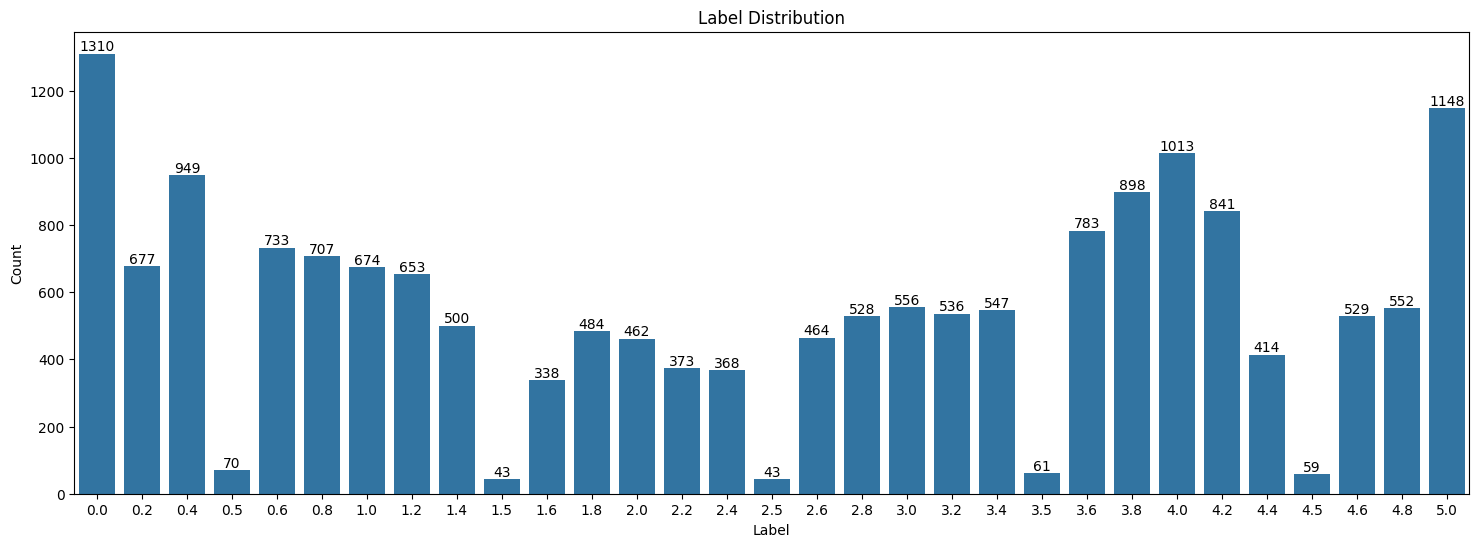

In [91]:
state(v4_data)